In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('Portfolio_by_Age.xls')
df

,Federal Student Loan Portfolio by Borrower Age,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Includes outstanding principal and interest ba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data Source: Enterprise Data Warehouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,24 and Younger,NaN,25 to 34,NaN,35 to 49,NaN,50 to 61,NaN,62 and Older,NaN,Not Reported,NaN
4,Federal Fiscal Year,NaN,Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions),Dollars Outstanding (in billions),Borrowers (in millions)
5,2017,Q2,134.3,8.6,477.4,15.3,484.7,13.5,191.9,5.6,51.9,1.7,0.3,0.1
6,2017,Q3,126.5,8.2,477.8,15.2,490.2,13.5,194.1,5.6,53.2,1.7,0.2,0.1
7,2017,Q4,130.3,8.7,484,15.3,502.2,13.7,199.8,5.7,55.4,1.7,0.3,0.1
8,2018,Q1,124.4,8.6,483.8,15.3,511.3,13.8,204,5.7,57.9,1.8,0.2,0.1
9,2018,Q2,129.1,8.4,488.6,15.2,522.4,13.8,210.3,5.8,60.5,1.8,0.2,0.1


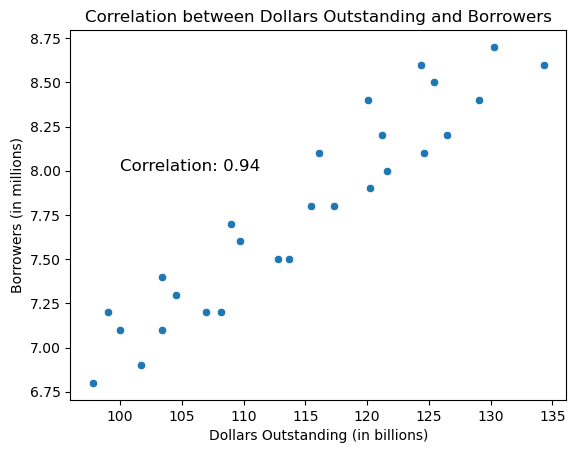

In [109]:
dollar_age_df = df.drop(df.index[-2:])
dollar_age_df = dollar_age_df.iloc[5:]
dollar_age_df_2017 = dollar_age_df[[dollar_age_df.columns[2], dollar_age_df.columns[3]]].copy()
dollar_age_df_2017.columns = ['Dollars Outstanding', 'Borrowers']
dollar_age_df_2017['Dollars Outstanding'] = dollar_age_df_2017['Dollars Outstanding'].astype(float)
dollar_age_df_2017['Borrowers'] = dollar_age_df_2017['Borrowers'].astype(float)

correlation_coefficient = dollar_age_df_2017['Dollars Outstanding'].corr(dollar_age_df_2017['Borrowers'])

# Create a scatterplot
sns.scatterplot(x='Dollars Outstanding', y='Borrowers', data=dollar_age_df_2017)

# Add the correlation coefficient to the plot
plt.text(100, 8, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Customize plot labels and title
plt.xlabel('Dollars Outstanding (in billions)')
plt.ylabel('Borrowers (in millions)')
plt.title('Correlation between Dollars Outstanding and Borrowers')

# Show the plot
plt.show()

In [110]:
age_df = df.drop(df.index[-2:])
age_df = age_df.iloc[5:]
age_df.drop(age_df.columns[[1, 2, 4, 6, 8, 10, 12, 13]], axis=1, inplace=True)
age_df.columns = ['Year', '24 and Younger', '25 to 34', '35 to 49', '50 to 61', '62 and Older']
age_df

,Year,24 and Younger,25 to 34,35 to 49,50 to 61,62 and Older
5,2017,8.6,15.3,13.5,5.6,1.7
6,2017,8.2,15.2,13.5,5.6,1.7
7,2017,8.7,15.3,13.7,5.7,1.7
8,2018,8.6,15.3,13.8,5.7,1.8
9,2018,8.4,15.2,13.8,5.8,1.8
10,2018,8,15.1,13.8,5.8,1.8
11,2018,8.5,15.2,14,5.8,1.9
12,2019,8.4,15.2,14.1,5.9,1.9
13,2019,8.1,15.1,14.1,5.9,2
14,2019,7.8,15,14,5.9,2


In [111]:
age_df = age_df.groupby(['Year']).mean()
age_df.astype('float').round(1)
age_df_melt = age_df.copy()

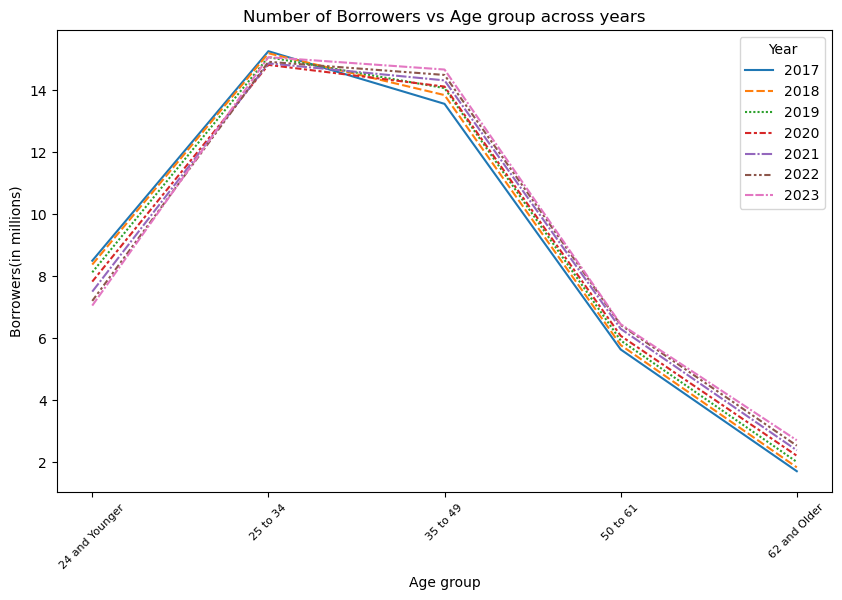

In [112]:
plt.figure(figsize=(10, 6))

# Create line plot
sns.lineplot(data=age_df.T)  # Transpose the DataFrame for proper x-axis labeling

# Add title and axis labels
plt.title("Number of Borrowers vs Age group across years")
plt.xlabel("Age group")
plt.ylabel("Borrowers(in millions)")

# Rotate x-axis labels (optional)
plt.xticks(rotation=45, fontsize=8)

# Display the plot
plt.show()

In [113]:
age_df = df.drop(df.index[-2:])
age_df = age_df.iloc[5:]
age_df.drop(age_df.columns[[1, 3, 5, 7, 9, 11, 12, 13]], axis=1, inplace=True)
age_df.columns = ['Year', '24 and Younger', '25 to 34', '35 to 49', '50 to 61', '62 and Older']
age_df

,Year,24 and Younger,25 to 34,35 to 49,50 to 61,62 and Older
5,2017,134.3,477.4,484.7,191.9,51.9
6,2017,126.5,477.8,490.2,194.1,53.2
7,2017,130.3,484,502.2,199.8,55.4
8,2018,124.4,483.8,511.3,204,57.9
9,2018,129.1,488.6,522.4,210.3,60.5
10,2018,121.6,489,529.6,213.6,62.5
11,2018,125.4,494.8,540.3,219.4,65.2
12,2019,120.1,494.2,548.4,224.1,67.8
13,2019,124.6,497.6,557.6,230.4,70.4
14,2019,117.3,497,564,234.1,72.9


In [114]:
age_df = age_df.groupby(['Year']).mean()
age_df.astype('float').round(1)

,24 and Younger,25 to 34,35 to 49,50 to 61,62 and Older
Year,,,,,
2017,130.4,479.7,492.4,195.3,53.5
2018,125.1,489.0,525.9,211.8,61.5
2019,120.8,497.6,561.4,232.4,71.8
2020,116.2,499.2,591.8,254.1,82.6
2021,109.8,498.8,614.0,274.5,93.6
2022,104.4,496.2,628.4,288.3,103.2
2023,100.0,494.7,632.1,292.2,112.0


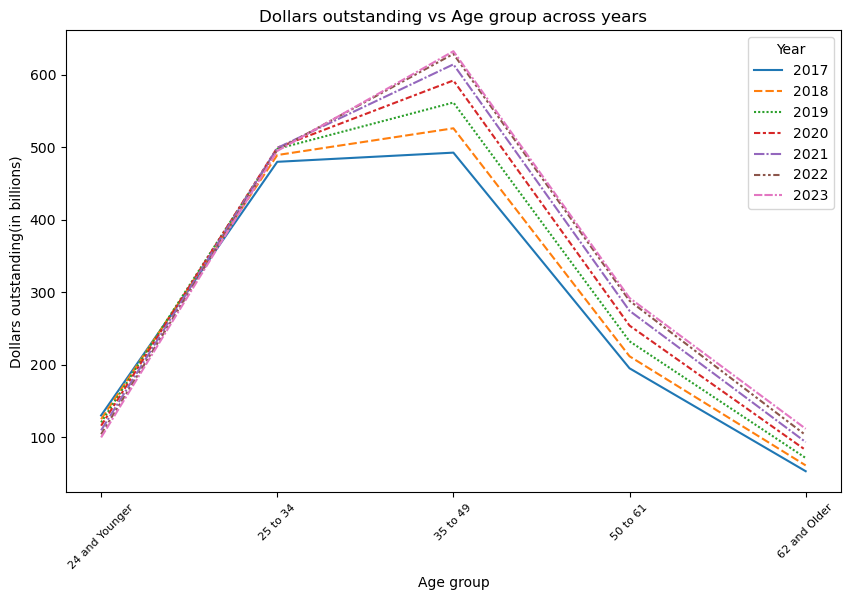

In [115]:
plt.figure(figsize=(10, 6))

# Create line plot
sns.lineplot(data=age_df.T)  # Transpose the DataFrame for proper x-axis labeling

# Add title and axis labels
plt.title("Dollars outstanding vs Age group across years")
plt.xlabel("Age group")
plt.ylabel("Dollars outstanding(in billions)")

# Rotate x-axis labels (optional)
plt.xticks(rotation=45, fontsize=8)

# Display the plot
plt.show()

In [116]:
#To plot box plot or violin plot 
age_df = df.drop(df.index[-2:])
age_df = age_df.iloc[5:]
age_df.drop(age_df.columns[[1, 3, 5, 7, 9, 11, 12, 13]], axis=1, inplace=True)
age_df.columns = ['Year', '24 and Younger', '25 to 34', '35 to 49', '50 to 61', '62 and Older']
age_df

,Year,24 and Younger,25 to 34,35 to 49,50 to 61,62 and Older
5,2017,134.3,477.4,484.7,191.9,51.9
6,2017,126.5,477.8,490.2,194.1,53.2
7,2017,130.3,484,502.2,199.8,55.4
8,2018,124.4,483.8,511.3,204,57.9
9,2018,129.1,488.6,522.4,210.3,60.5
10,2018,121.6,489,529.6,213.6,62.5
11,2018,125.4,494.8,540.3,219.4,65.2
12,2019,120.1,494.2,548.4,224.1,67.8
13,2019,124.6,497.6,557.6,230.4,70.4
14,2019,117.3,497,564,234.1,72.9


In [117]:
age_df = age_df.iloc[:,1:] 
melted_df = age_df.melt(var_name="Age_group", value_name="Dollars outstanding")

In [118]:
melted_df["Dollars outstanding"] = melted_df["Dollars outstanding"].astype(float)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


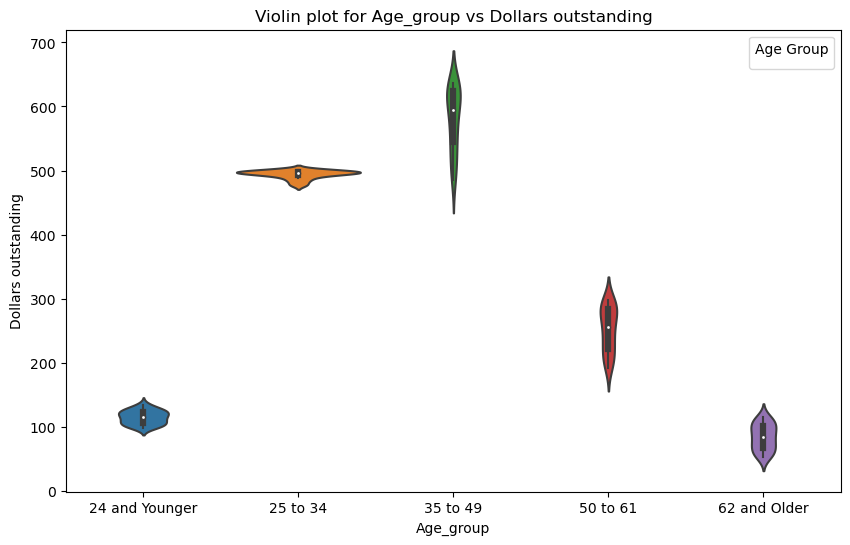

In [119]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Age_group", y="Dollars outstanding", data=melted_df)
plt.title("Violin plot for Age_group vs Dollars outstanding")
plt.xlabel("Age_group")
plt.ylabel("Dollars outstanding")
plt.legend(title="Age Group")
plt.show()

In [120]:
age_df = df.drop(df.index[-2:])
age_df = age_df.iloc[5:]
age_df.drop(age_df.columns[[1, 2, 4, 6, 8, 10, 12, 13]], axis=1, inplace=True)
age_df.columns = ['Year', '24 and Younger', '25 to 34', '35 to 49', '50 to 61', '62 and Older']
age_df

,Year,24 and Younger,25 to 34,35 to 49,50 to 61,62 and Older
5,2017,8.6,15.3,13.5,5.6,1.7
6,2017,8.2,15.2,13.5,5.6,1.7
7,2017,8.7,15.3,13.7,5.7,1.7
8,2018,8.6,15.3,13.8,5.7,1.8
9,2018,8.4,15.2,13.8,5.8,1.8
10,2018,8,15.1,13.8,5.8,1.8
11,2018,8.5,15.2,14,5.8,1.9
12,2019,8.4,15.2,14.1,5.9,1.9
13,2019,8.1,15.1,14.1,5.9,2
14,2019,7.8,15,14,5.9,2


In [121]:
age_df = age_df.iloc[:,1:] 
melted_df = age_df.melt(var_name="Age_group", value_name="Number of Borrowers")
melted_df["Number of Borrowers"] = melted_df["Number of Borrowers"].astype(float)

In [122]:
age_df_melt.reset_index(inplace=True)
age_df_melt = pd.melt(age_df_melt, id_vars=["Year"], value_vars=age_df_melt.columns[1:], var_name="Age_group", value_name="Borrowers")


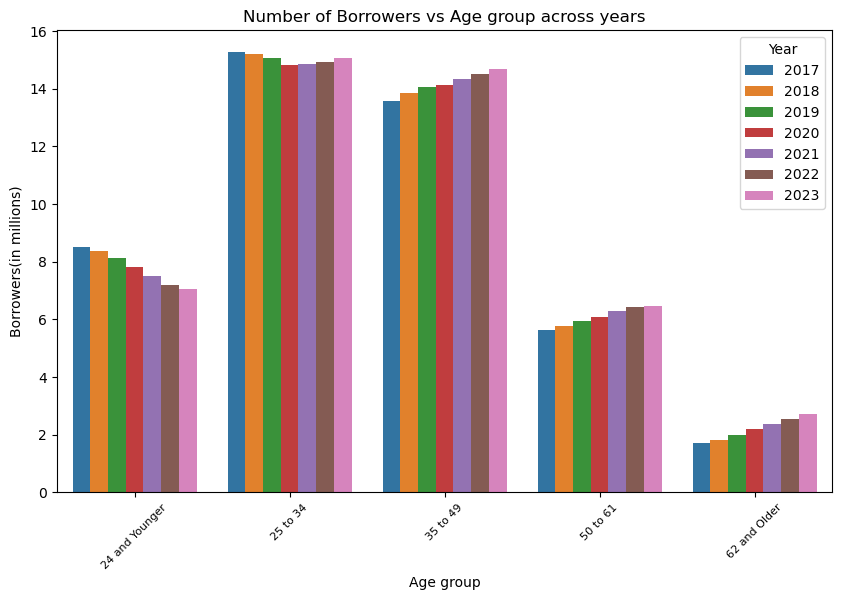

In [124]:
plt.figure(figsize=(10, 6))

# Create line plot
sns.barplot(age_df_melt, x="Age_group", y="Borrowers", hue="Year")  # Transpose the DataFrame for proper x-axis labeling

# Add title and axis labels
plt.title("Number of Borrowers vs Age group across years")
plt.xlabel("Age group")
plt.ylabel("Borrowers(in millions)")

# Rotate x-axis labels (optional)
plt.xticks(rotation=45, fontsize=8)

# Display the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


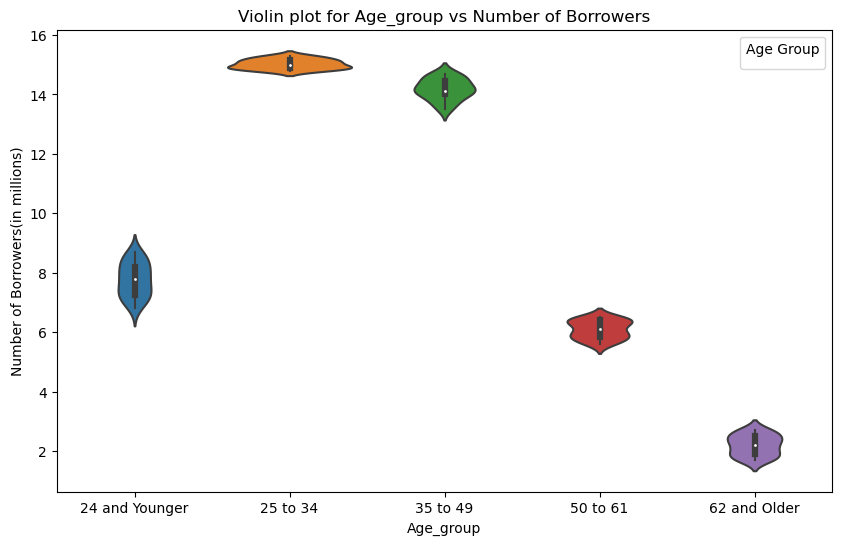

In [60]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Age_group", y="Number of Borrowers", data=melted_df)
plt.title("Violin plot for Age_group vs Number of Borrowers")
plt.xlabel("Age_group")
plt.ylabel("Number of Borrowers(in millions)")
plt.legend(title="Age Group")
plt.show()